In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
dmatrix_df = pd.read_csv("distance_matrix.csv")
dmatrix_df.head()

,Unnamed: 0,destination,distance,duration,mode,origin
0,0,98007,0,0,driving,98007
1,1,98290,56135,2838,driving,98007
2,2,98065,38955,2417,driving,98007
3,3,98801,236385,10226,driving,98007
4,4,98104,23032,1315,driving,98007


In [4]:
dmatrix_df.drop(dmatrix_df.columns[0], axis =1, inplace = True)
dmatrix_df.head()

,destination,distance,duration,mode,origin
0,98007,0,0,driving,98007
1,98290,56135,2838,driving,98007
2,98065,38955,2417,driving,98007
3,98801,236385,10226,driving,98007
4,98104,23032,1315,driving,98007


In [5]:
dmatrix_df = dmatrix_df[['mode', 'origin', 'destination', 'distance', 'duration']]
dmatrix_df.head()

,mode,origin,destination,distance,duration
0,driving,98007,98007,0,0
1,driving,98007,98290,56135,2838
2,driving,98007,98065,38955,2417
3,driving,98007,98801,236385,10226
4,driving,98007,98104,23032,1315


In [6]:
dmatrix_mode_pivot = pd.pivot_table(dmatrix_df, values = 'duration', index = ['origin', 'destination'], columns = 'mode')
dmatrix_mode_pivot

mode                bicycling   bus  driving  rail  walking
origin destination                                         
98007  98007                0     0        0     0        0
       98065             9172    -1     2417    -1    30934
       98104             5428  4243     1315  4902    14944
       98290            11761    -1     2838    -1    36411
       98801            54921    -1    10226    -1   168234
98065  98007             8726    -1     2191    -1    27316
       98065                0     0        0     0        0
       98104            12329    -1     2676    -1    37824
       98290            12966    -1     4036    -1    43985
       98801            47526    -1     9839    -1   145698
98104  98007             5775  3503     1141  4115    15360
       98065            13276    -1     2736    -1    41851
       98104                0     0        0     0        0
       98290            14926    -1     3016    -1    44449
       98801            59025    -1    10545    -1   179151
98290  98007            11209    -1     2911    -1    36087
       98065            13077    -1     4027    -1    44034
       98104            14776    -1     2980    -1    43643
       98290                0     0        0     0        0
       98801            58827    -1     9919    -1   147877
98801  98007            53417    -1    10008    -1   166292
       98065            46758    -1     9788    -1   144971
       98104            57020    -1    10493    -1   176799
       98290            57916    -1     9926    -1   146095
       98801                0     0        0     0        0

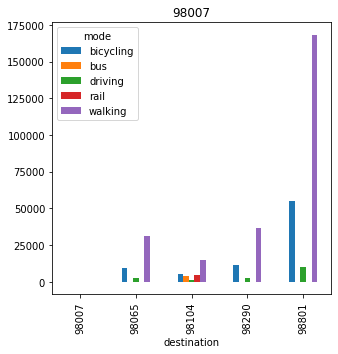

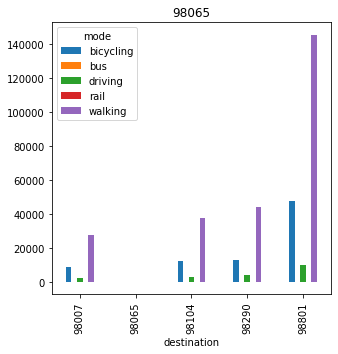

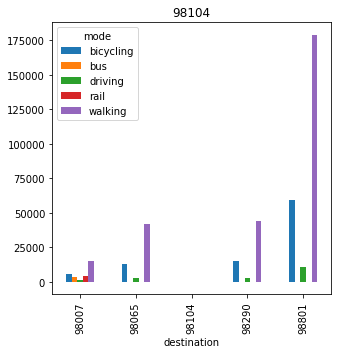

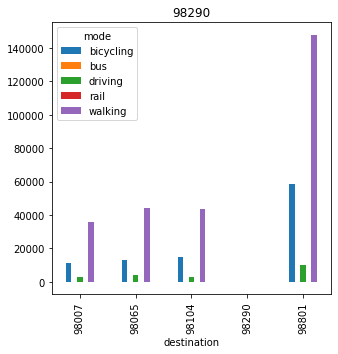

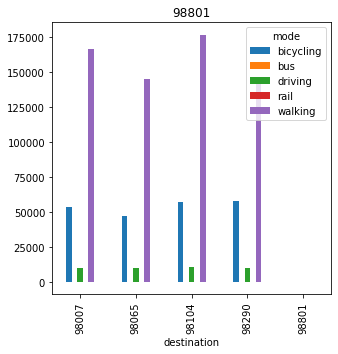

In [7]:
for group_name, grp in dmatrix_df.groupby('origin'):
    plot_table = grp.pivot(index='destination', columns='mode', values='duration')
    plot_table.plot(kind = 'bar', title = group_name, figsize = (5,5))

In [8]:
dmatrix_mode_pivot = pd.DataFrame(dmatrix_mode_pivot.to_records())
dmatrix_mode_pivot.head()

,origin,destination,bicycling,bus,driving,rail,walking
0,98007,98007,0,0,0,0,0
1,98007,98065,9172,-1,2417,-1,30934
2,98007,98104,5428,4243,1315,4902,14944
3,98007,98290,11761,-1,2838,-1,36411
4,98007,98801,54921,-1,10226,-1,168234


In [9]:
dmatrix_mode_pivot = dmatrix_mode_pivot.drop(dmatrix_mode_pivot[dmatrix_mode_pivot['origin'] == dmatrix_mode_pivot['destination']].index, axis=0).reset_index(drop = True)
dmatrix_mode_pivot.head()

,origin,destination,bicycling,bus,driving,rail,walking
0,98007,98065,9172,-1,2417,-1,30934
1,98007,98104,5428,4243,1315,4902,14944
2,98007,98290,11761,-1,2838,-1,36411
3,98007,98801,54921,-1,10226,-1,168234
4,98065,98007,8726,-1,2191,-1,27316


In [10]:
dm_driving = dmatrix_mode_pivot[['origin', 'destination','driving']].copy()
dm_driving

,origin,destination,driving
0,98007,98065,2417
1,98007,98104,1315
2,98007,98290,2838
3,98007,98801,10226
4,98065,98007,2191
5,98065,98104,2676
6,98065,98290,4036
7,98065,98801,9839
8,98104,98007,1141
9,98104,98065,2736


In [11]:
average_time =[]
for index, row in dm_driving.iterrows():
    origin = row['origin']
    destination = row['destination']
    for index1, row1 in dm_driving.iterrows():
        if(row1['origin'] == destination and row1['destination'] == origin):
            average = (row['driving'] + row1['driving']) / 2
            average_time.append(average)
average_time

[2304.0,
 1228.0,
 2874.5,
 10117.0,
 2304.0,
 2706.0,
 4031.5,
 9813.5,
 1228.0,
 2706.0,
 2998.0,
 10519.0,
 2874.5,
 4031.5,
 2998.0,
 9922.5,
 10117.0,
 9813.5,
 10519.0,
 9922.5]

In [12]:
dm_driving['average_drive_time'] = average_time
dm_driving

,origin,destination,driving,average_drive_time
0,98007,98065,2417,2304.0
1,98007,98104,1315,1228.0
2,98007,98290,2838,2874.5
3,98007,98801,10226,10117.0
4,98065,98007,2191,2304.0
5,98065,98104,2676,2706.0
6,98065,98290,4036,4031.5
7,98065,98801,9839,9813.5
8,98104,98007,1141,1228.0
9,98104,98065,2736,2706.0


In [13]:
origin_zipcodes = dm_driving['origin'].unique()
origin_zipcodes

array([98007, 98065, 98104, 98290, 98801], dtype=int64)

In [14]:
nearest_facility = []
for origin in origin_zipcodes:
    origin_df = dm_driving[dm_driving['origin'] == origin].copy()
    print(origin_df)
    print(origin_df.average_drive_time.idxmin())
    d = {'origin': origin, 'destination': origin_df['destination'][origin_df['average_drive_time'].idxmin()], 'average_time': origin_df['average_drive_time'].min(0)}
    nearest_facility.append(d)
nearest_facility

   origin  destination  driving  average_drive_time
0   98007        98065     2417              2304.0
1   98007        98104     1315              1228.0
2   98007        98290     2838              2874.5
3   98007        98801    10226             10117.0
1
   origin  destination  driving  average_drive_time
4   98065        98007     2191              2304.0
5   98065        98104     2676              2706.0
6   98065        98290     4036              4031.5
7   98065        98801     9839              9813.5
4
    origin  destination  driving  average_drive_time
8    98104        98007     1141              1228.0
9    98104        98065     2736              2706.0
10   98104        98290     3016              2998.0
11   98104        98801    10545             10519.0
8
    origin  destination  driving  average_drive_time
12   98290        98007     2911              2874.5
13   98290        98065     4027              4031.5
14   98290        98104     2980              2998

[{'origin': 98007, 'destination': 98104, 'average_time': 1228.0},
 {'origin': 98065, 'destination': 98007, 'average_time': 2304.0},
 {'origin': 98104, 'destination': 98007, 'average_time': 1228.0},
 {'origin': 98290, 'destination': 98007, 'average_time': 2874.5},
 {'origin': 98801, 'destination': 98065, 'average_time': 9813.5}]

In [15]:
near_area_zipcodes_df = pd.DataFrame(nearest_facility)
near_area_zipcodes_df

,origin,destination,average_time
0,98007,98104,1228.0
1,98065,98007,2304.0
2,98104,98007,1228.0
3,98290,98007,2874.5
4,98801,98065,9813.5


In [16]:
near_area_zipcodes_df = near_area_zipcodes_df[['origin','destination','average_time']]
near_area_zipcodes_df

,origin,destination,average_time
0,98007,98104,1228.0
1,98065,98007,2304.0
2,98104,98007,1228.0
3,98290,98007,2874.5
4,98801,98065,9813.5


In [17]:
facilities_df = pd.read_csv("facilities.csv")
facilities_df

,Facility ID,Facility Area-Zipcode,Facility Staff Count
0,Facility A,98007,21
1,Facility B,98290,52
2,Facility C,98065,43
3,Facility D,98801,9
4,Facility E,98104,64


In [18]:
facilities_df = (facilities_df.merge(near_area_zipcodes_df, left_on='Facility Area-Zipcode', right_on='origin').reindex(columns=['Facility ID', 'Facility Area-Zipcode', 'destination', 'average_time','Facility Staff Count']))
facilities_df

,Facility ID,Facility Area-Zipcode,destination,average_time,Facility Staff Count
0,Facility A,98007,98104,1228.0,21
1,Facility B,98290,98007,2874.5,52
2,Facility C,98065,98007,2304.0,43
3,Facility D,98801,98065,9813.5,9
4,Facility E,98104,98007,1228.0,64


In [19]:
population_df = pd.read_csv("facility_pop_2017/ACS_17_5YR_DP05_with_ann.csv")
population_df

,GEO.id,GEO.id2,GEO.display-label,HC01_VC03,HC02_VC03,HC03_VC03,HC04_VC03,HC01_VC04,HC02_VC04,HC03_VC04,...,HC03_VC113,HC04_VC113,HC01_VC114,HC02_VC114,HC03_VC114,HC04_VC114,HC01_VC115,HC02_VC115,HC03_VC115,HC04_VC115
0,Id,Id2,Geography,Estimate; SEX AND AGE - Total population,Margin of Error; SEX AND AGE - Total population,Percent; SEX AND AGE - Total population,Percent Margin of Error; SEX AND AGE - Total p...,Estimate; SEX AND AGE - Total population - Male,Margin of Error; SEX AND AGE - Total populatio...,Percent; SEX AND AGE - Total population - Male,...,"Percent; CITIZEN, VOTING AGE POPULATION - Citi...","Percent Margin of Error; CITIZEN, VOTING AGE P...","Estimate; CITIZEN, VOTING AGE POPULATION - Cit...","Margin of Error; CITIZEN, VOTING AGE POPULATIO...","Percent; CITIZEN, VOTING AGE POPULATION - Citi...","Percent Margin of Error; CITIZEN, VOTING AGE P...","Estimate; CITIZEN, VOTING AGE POPULATION - Cit...","Margin of Error; CITIZEN, VOTING AGE POPULATIO...","Percent; CITIZEN, VOTING AGE POPULATION - Citi...","Percent Margin of Error; CITIZEN, VOTING AGE P..."
1,8600000US98007,98007,ZCTA5 98007,27954,1153,27954,(X),15275,1022,54.6,...,12611,(X),6374,677,50.5,3.4,6237,520,49.5,3.4
2,8600000US98065,98065,ZCTA5 98065,15081,329,15081,(X),7462,284,49.5,...,9360,(X),4609,260,49.2,1.7,4751,318,50.8,1.7
3,8600000US98104,98104,ZCTA5 98104,14143,655,14143,(X),8610,569,60.9,...,11717,(X),7263,502,62.0,2.5,4454,328,38.0,2.5
4,8600000US98290,98290,ZCTA5 98290,34043,1070,34043,(X),16735,681,49.2,...,25138,(X),12187,467,48.5,1.4,12951,625,51.5,1.4
5,8600000US98801,98801,ZCTA5 98801,43242,998,43242,(X),21161,686,48.9,...,29538,(X),13980,650,47.3,1.5,15558,597,52.7,1.5


In [20]:
population_df.columns = population_df.iloc[0]
population_df = population_df[1:].reset_index()
population_df

,index,Id,Id2,Geography,Estimate; SEX AND AGE - Total population,Margin of Error; SEX AND AGE - Total population,Percent; SEX AND AGE - Total population,Percent Margin of Error; SEX AND AGE - Total population,Estimate; SEX AND AGE - Total population - Male,Margin of Error; SEX AND AGE - Total population - Male,...,"Percent; CITIZEN, VOTING AGE POPULATION - Citizen, 18 and over population","Percent Margin of Error; CITIZEN, VOTING AGE POPULATION - Citizen, 18 and over population","Estimate; CITIZEN, VOTING AGE POPULATION - Citizen, 18 and over population - Male","Margin of Error; CITIZEN, VOTING AGE POPULATION - Citizen, 18 and over population - Male","Percent; CITIZEN, VOTING AGE POPULATION - Citizen, 18 and over population - Male","Percent Margin of Error; CITIZEN, VOTING AGE POPULATION - Citizen, 18 and over population - Male","Estimate; CITIZEN, VOTING AGE POPULATION - Citizen, 18 and over population - Female","Margin of Error; CITIZEN, VOTING AGE POPULATION - Citizen, 18 and over population - Female","Percent; CITIZEN, VOTING AGE POPULATION - Citizen, 18 and over population - Female","Percent Margin of Error; CITIZEN, VOTING AGE POPULATION - Citizen, 18 and over population - Female"
0,1,8600000US98007,98007,ZCTA5 98007,27954,1153,27954,(X),15275,1022,...,12611,(X),6374,677,50.5,3.4,6237,520,49.5,3.4
1,2,8600000US98065,98065,ZCTA5 98065,15081,329,15081,(X),7462,284,...,9360,(X),4609,260,49.2,1.7,4751,318,50.8,1.7
2,3,8600000US98104,98104,ZCTA5 98104,14143,655,14143,(X),8610,569,...,11717,(X),7263,502,62.0,2.5,4454,328,38.0,2.5
3,4,8600000US98290,98290,ZCTA5 98290,34043,1070,34043,(X),16735,681,...,25138,(X),12187,467,48.5,1.4,12951,625,51.5,1.4
4,5,8600000US98801,98801,ZCTA5 98801,43242,998,43242,(X),21161,686,...,29538,(X),13980,650,47.3,1.5,15558,597,52.7,1.5


In [21]:
population_df['Id2'] = population_df['Id2'].astype(int)
population_df['Estimate; SEX AND AGE - Total population'] = population_df['Estimate; SEX AND AGE - Total population'].astype(int)
population_df = population_df.rename(columns = {'Estimate; SEX AND AGE - Total population' : 'Population'})

In [22]:
population_df = population_df[population_df.columns[0:5]]
population_df

,index,Id,Id2,Geography,Population
0,1,8600000US98007,98007,ZCTA5 98007,27954
1,2,8600000US98065,98065,ZCTA5 98065,15081
2,3,8600000US98104,98104,ZCTA5 98104,14143
3,4,8600000US98290,98290,ZCTA5 98290,34043
4,5,8600000US98801,98801,ZCTA5 98801,43242


In [23]:
facilities_df = (facilities_df.merge(population_df, left_on='Facility Area-Zipcode', right_on='Id2').reindex(columns=['Facility ID', 'Facility Area-Zipcode', 'destination', 'average_time', 'Facility Staff Count', 'Population']))
facilities_df

,Facility ID,Facility Area-Zipcode,destination,average_time,Facility Staff Count,Population
0,Facility A,98007,98104,1228.0,21,27954
1,Facility B,98290,98007,2874.5,52,34043
2,Facility C,98065,98007,2304.0,43,15081
3,Facility D,98801,98065,9813.5,9,43242
4,Facility E,98104,98007,1228.0,64,14143


In [24]:
facilities_df.drop('average_time', axis = 1, inplace = True)
facilities_df = facilities_df.rename({'Facility ID' : 'FacilityID', 'Facility Area-Zipcode' : 'AreaZipcode', 'destination' : 'NearestAreaZipcode', 'Facility Staff Count' : 'StaffCount'}, axis = 'columns')
facilities_df

,FacilityID,AreaZipcode,NearestAreaZipcode,StaffCount,Population
0,Facility A,98007,98104,21,27954
1,Facility B,98290,98007,52,34043
2,Facility C,98065,98007,43,15081
3,Facility D,98801,98065,9,43242
4,Facility E,98104,98007,64,14143


In [25]:
facilities_df['Ratio'] = facilities_df['StaffCount']/(facilities_df['Population'])
facilities_df

,FacilityID,AreaZipcode,NearestAreaZipcode,StaffCount,Population,Ratio
0,Facility A,98007,98104,21,27954,0.000751
1,Facility B,98290,98007,52,34043,0.001527
2,Facility C,98065,98007,43,15081,0.002851
3,Facility D,98801,98065,9,43242,0.000208
4,Facility E,98104,98007,64,14143,0.004525


In [26]:
def pred_staff(population, ratio):
    y = (population) * ratio
    return y

In [27]:
y_pred = pred_staff(facilities_df['Population'], facilities_df['Ratio'])
y_pred

0    21.0
1    52.0
2    43.0
3     9.0
4    64.0
dtype: float64

In [28]:
min_ratio = 1/2808

In [29]:
y_pred_ = pred_staff(facilities_df['Population'], min_ratio)

In [30]:
y_pred_

0     9.955128
1    12.123575
2     5.370726
3    15.399573
4     5.036681
Name: Population, dtype: float64

In [31]:
import math
y_pred_ = y_pred_.apply(lambda x: math.ceil(x))
y_pred_

0    10
1    13
2     6
3    16
4     6
Name: Population, dtype: int64

In [32]:
min_staff_in_area_facility_df = pd.DataFrame({'ZipCode': facilities_df['AreaZipcode'], 'MinStaff': y_pred_})
min_staff_in_area_facility_df

,ZipCode,MinStaff
0,98007,10
1,98290,13
2,98065,6
3,98801,16
4,98104,6


In [33]:
facilities_df['ProposedStaff'] = facilities_df['StaffCount']
facilities_df

,FacilityID,AreaZipcode,NearestAreaZipcode,StaffCount,Population,Ratio,ProposedStaff
0,Facility A,98007,98104,21,27954,0.000751,21
1,Facility B,98290,98007,52,34043,0.001527,52
2,Facility C,98065,98007,43,15081,0.002851,43
3,Facility D,98801,98065,9,43242,0.000208,9
4,Facility E,98104,98007,64,14143,0.004525,64


In [34]:
min_staff_indices = facilities_df.index[facilities_df['ProposedStaff'] <  min_staff_in_area_facility_df['MinStaff']]
min_staff_indices

Int64Index([3], dtype='int64')

In [35]:
print(min_staff_indices.values)

[3]


In [36]:
for item in min_staff_indices:
    staff_count = facilities_df['ProposedStaff'][item]
    facilities_df['ProposedStaff'][item] = min_staff_in_area_facility_df['MinStaff'][item]
    near_facility = facilities_df['NearestAreaZipcode'][item]
    index = facilities_df[facilities_df['AreaZipcode'] == near_facility].index[0]
    facilities_df['ProposedStaff'][index] = facilities_df['ProposedStaff'][index] + staff_count - min_staff_in_area_facility_df['MinStaff'][item]
   

E:\anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
E:\anaconda\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [37]:
facilities_df

,FacilityID,AreaZipcode,NearestAreaZipcode,StaffCount,Population,Ratio,ProposedStaff
0,Facility A,98007,98104,21,27954,0.000751,21
1,Facility B,98290,98007,52,34043,0.001527,52
2,Facility C,98065,98007,43,15081,0.002851,36
3,Facility D,98801,98065,9,43242,0.000208,16
4,Facility E,98104,98007,64,14143,0.004525,64


proposed_staff_df = facilities_df[['FacilityID', 'AreaZipcode', 'StaffCount', 'ProposedStaff']]
proposed_staff_df

In [39]:
proposed_staff_df.to_csv("proposed_staff.csv")

Conclusion:
    so here we see that minimum staff required by Area A and Area B are 10 and 13 and they have 21 and 52 staff already so there is no need to transfer any members.